In [1]:
import pandas as pd
import os
import plotly.express as px
from IPython.display import Image
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv(
    "./data/mammoth_mountain_snowfall_melted_table_with_monthly_average.csv"
)
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df

,Month,Snow Fall,MonthlyAverage
Date,,,
1970-01-01,Jan,78.0,71.333333
1970-02-01,Feb,30.5,69.761111
1970-03-01,Mar,46.0,63.718519
1970-04-01,Apr,27.0,32.924074
1970-05-01,May,0.0,8.029630
...,...,...,...
2023-08-01,Aug,0.0,2.870370
2023-09-01,Sep,0.0,2.870370
2023-10-01,Oct,0.0,6.372222


In [3]:
df = df.reindex(pd.date_range(start=df.index[0], periods=len(df), freq="MS"))
df.index.set_names("Date", inplace=True)
df

,Month,Snow Fall,MonthlyAverage
Date,,,
1970-01-01,Jan,78.0,71.333333
1970-02-01,Feb,30.5,69.761111
1970-03-01,Mar,46.0,63.718519
1970-04-01,Apr,27.0,32.924074
1970-05-01,May,0.0,8.029630
...,...,...,...
2023-08-01,Aug,0.0,2.870370
2023-09-01,Sep,0.0,2.870370
2023-10-01,Oct,0.0,6.372222


In [4]:
df_small = df["2000":][["Snow Fall"]]
df_small.head()

,Snow Fall
Date,
2000-01-01,121.4
2000-02-01,136.1
2000-03-01,48.6
2000-04-01,41.0
2000-05-01,11.0


In [5]:
df_small_daily_interp = df_small.reindex(
    pd.date_range(start=df_small.index[0], end=df_small.index[-1], freq="D")
).interpolate(method="pchip")

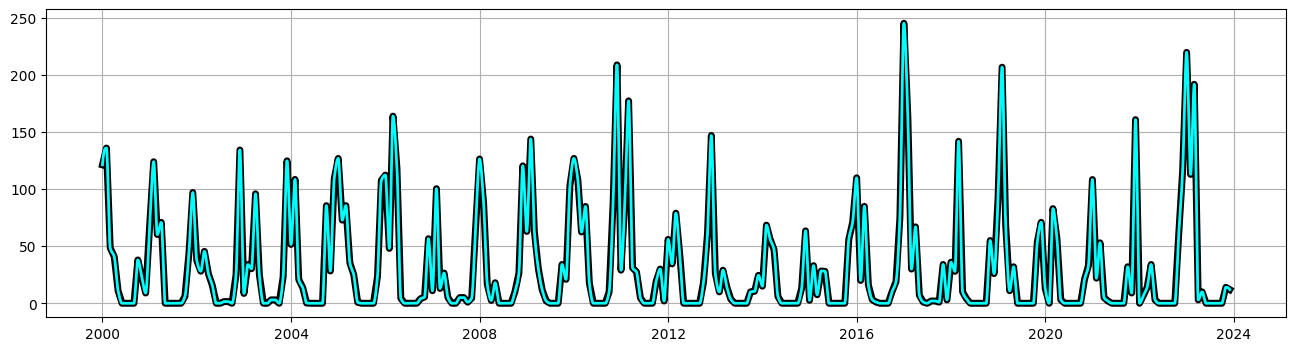

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(df_small["Snow Fall"], color="black", lw=5)
plt.plot(df_small_daily_interp["Snow Fall"], color="cyan", lw=2)
plt.grid()